# Ψάχνοντας για  Corelations στα δεδομένα μας 

## Εισάγουμε κάποιες βιβλιοθήκες που θα χρειαστούμε

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

## Φορτώνουμε τα δεδομένα στα οποία θα δουλέψουμε

In [4]:
df = pd.read_csv(r"C:\Users\chilly\Desktop\micronomic datas\clean_data_smoothed_and_ordered.csv")
df.head(10)


,observation_date_GDP,GDP,gdp_smooth,GDP/GDPSMTHD,observation_date_RGDP,RGDP,rgdp_smooth,RGDP/GDPSMTHD,observation_date_CP,capital inflow,capital inflow_smooth,capinfl/capinflsmthd,observation_date_PS,personal savings,personal savings_smooth,perssav/persavsmthd
0,1947-01-01,243.164000,NaN,0.833499,1947-01-01,2182.681000,NaN,0.916301,1960-01-01,0.926000,NaN,1.384054,1959-01-01,39.6,NaN,0.926369
1,1947-02-01,244.098667,NaN,0.836703,1947-02-01,2180.751333,NaN,0.915491,1960-02-01,0.921333,NaN,1.377079,1959-02-01,37.5,NaN,0.877243
2,1947-03-01,245.033333,NaN,0.839907,1947-03-01,2178.821667,NaN,0.914681,1960-03-01,0.916667,NaN,1.370104,1959-03-01,36.5,NaN,0.853850
3,1947-04-01,245.968000,NaN,0.843110,1947-04-01,2176.892000,NaN,0.913871,1960-04-01,0.912000,NaN,1.363129,1959-04-01,40.0,NaN,0.935726
4,1947-05-01,247.173667,NaN,0.847243,1947-05-01,2175.405333,NaN,0.913247,1960-05-01,0.735000,NaN,1.098574,1959-05-01,38.1,NaN,0.891279
5,1947-06-01,248.379333,NaN,0.851376,1947-06-01,2173.918667,NaN,0.912622,1960-06-01,0.558000,NaN,0.834020,1959-06-01,38.2,NaN,0.893619
6,1947-07-01,249.585000,NaN,0.855509,1947-07-01,2172.432000,NaN,0.911998,1960-07-01,0.381000,NaN,0.569465,1959-07-01,38.7,NaN,0.905315
7,1947-08-01,252.971667,NaN,0.867117,1947-08-01,2183.772000,NaN,0.916759,1960-08-01,0.279667,NaN,0.418006,1959-08-01,34.7,NaN,0.811743
8,1947-09-01,256.358333,NaN,0.878726,1947-09-01,2195.112000,NaN,0.921520,1960-09-01,0.178333,NaN,0.266547,1959-09-01,31.6,NaN,0.739224
9,1947-10-01,259.745000,NaN,0.890334,1947-10-01,2206.452000,NaN,0.926280,1960-10-01,0.077000,NaN,0.115089,1959-10-01,34.1,NaN,0.797707


## Ξεκινάμε να βρόυμε τα Μέγιστα και τα Ελάχιστα του capital inflow

In [10]:
# Μετατρέπουμε την στήλη των ημερομηνιών σε datetime
df['observation_date_CP'] = pd.to_datetime(df['observation_date_CP'].astype(str), errors='coerce')
# Όριζουμε στον άξονα τον x της ημερομηνίες και στον y της τιμές του capital inflow
x =df['observation_date_CP'] 
y=df['capinfl/capinflsmthd']

# Βρίσκουμε τοπικά μέγιστα χρησιμοποιώντας SciPy's συνάρτηση
max_indices, _ = find_peaks(y, prominence=0.001)  # 'prominence' : μετράει πόσο «ξεχωρίζει» μια κορυφή από το γύρω της τοπίο
max_values = y[max_indices]

# Βρίσκουμε τοπικά ελάχιστα χρησιμοποιώντας SciPy's συνάρτηση
min_indices, _ = find_peaks(-y, prominence=0.001)
min_values = y[min_indices]  # Note: these are the original (non-inverted) y values

# Τυπώνουμε τα μέγιστα και τα ελάχιστα  που βρήκαμε:
print("Local Maximum Indices:", max_indices)
print("Local Maximum Values:", max_values)
print("Local Minimum Indices:", min_indices)
print("Local Minimum Values:", min_values)



Local Maximum Indices: [ 18  24  39  57  66  75  81  90 105 120 126 138 150 156 171 183 201 207
 213 225 234 249 261 267 278 285 291 297 309 318 330 339 345 354 366 381
 387 393 405 414 423 441 453 459 465 471 477 492 501 507 516 528 537 546
 552 564 576 582 594 600 606 612 618 624 630 636 645]
Local Maximum Values: 18     1.396011
24     1.101564
39     2.282344
57     2.661987
66     0.988188
         ...   
618    0.872907
624    0.708567
630    1.602461
636    1.595110
645    1.642163
Name: capinfl/capinflsmthd, Length: 67, dtype: float64
Local Minimum Indices: [  9  21  30  42  63  69  78  84  96 117 123 129 147 153 162 180 186 204
 210 219 228 237 252 264 273 279 288 294 300 312 324 336 342 351 360 372
 384 390 396 411 417 432 447 456 462 468 474 486 498 504 510 522 534 540
 549 555 570 579 588 597 603 609 615 621 627 633 642]
Local Minimum Values: 9      0.115089
21     1.068681
30    -0.414020
42     0.306405
63    -0.535429
         ...   
615    0.368465
621    0.093838
627  

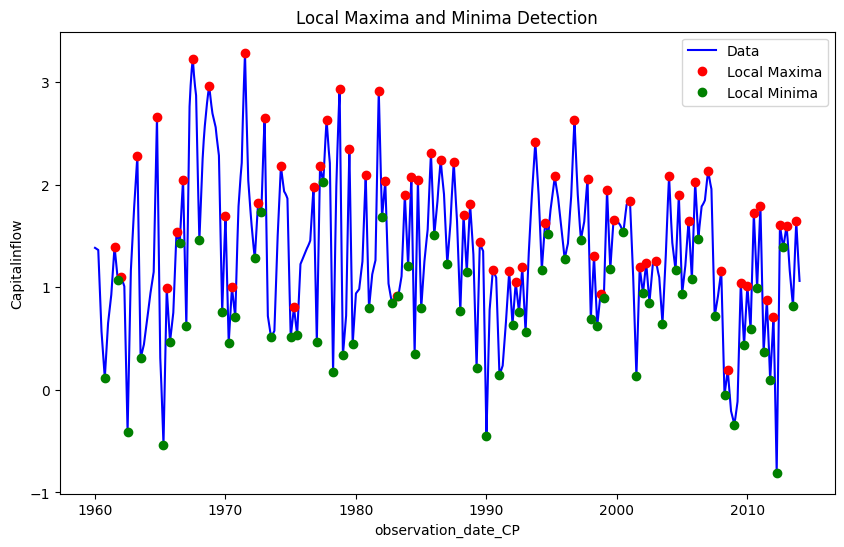

In [11]:
# Κάνουμε ένα plot που φαίνονται τα ελάχιστα και τα μέγιστα
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Data', color='blue')
plt.plot(x[max_indices], max_values, 'ro', label='Local Maxima')  # red: μέγιστα
plt.plot(x[min_indices], min_values, 'go', label='Local Minima')  # green: ελάχιστα
plt.xlabel('observation_date_CP')
plt.ylabel('Capitalinflow')
plt.title('Local Maxima and Minima Detection')
plt.legend()
plt.show()

## Κρατάμε τα ελάχιστα του capital inflow

In [12]:
df_new_min_cap=df.iloc[min_indices]

In [13]:
#παίρνουμε το Dataframe στο οποίο έχουμε της τιμές για τα GDP , Personal Savings όπου το capital inflow είναι ελάχιστο
df_new_min_cap[['capinfl/capinflsmthd','GDP/GDPSMTHD','perssav/persavsmthd']].dropna()

,capinfl/capinflsmthd,GDP/GDPSMTHD,perssav/persavsmthd
9,0.115089,0.890334,0.797707
21,1.068681,0.961017,0.874904
30,-0.414020,0.935388,1.111175
42,0.306405,1.056264,1.129890
63,-0.535429,1.213670,1.345352
...,...,...,...
615,0.368465,1.142813,1.726398
621,0.093838,1.151323,1.535540
627,-0.807742,1.147556,1.523907
633,1.389258,1.159530,1.404674


In [ ]:
#αποθηκεύουμε το Dataframe καθώς μπορεί να μας βοηθήσει πιθανές συσχετίσεις
file_path = r'C:\Users\chilly\Desktop\micronomic datas\clean_data_min_capinfmin.csv'
df_new_min.to_csv(file_path, index=False)

## Κρατάμε τα μέγιστα του capital inflow

In [14]:
df_new_max_cap=df.iloc[max_indices]

In [15]:
#παίρνουμε το Dataframe στο οποίο έχουμε της τιμές για τα GDP , Personal Savings όπου το capital inflow είναι ελάχιστο
df_new_max_cap[['capinfl/capinflsmthd','GDP/GDPSMTHD','perssav/persavsmthd']].dropna()

,capinfl/capinflsmthd,GDP/GDPSMTHD,perssav/persavsmthd
18,1.396011,0.957007,0.919351
24,1.101564,0.942741,0.989531
39,2.282344,0.995353,1.136908
57,2.661987,1.220880,1.204748
66,0.988188,1.212383,1.213369
...,...,...,...
618,0.872907,1.146036,1.671538
624,0.708567,1.149620,1.660411
630,1.602461,1.150803,1.568013
636,1.595110,1.154909,1.599950


In [ ]:
#αποθηκεύουμε το Dataframe καθώς μπορεί να μας βοηθήσει πιθανές συσχετίσεις
file_path = r'C:\Users\chilly\Desktop\micronomic datas\clean_data_max_capinfmax.csv'
df_new_min.to_csv(file_path, index=False)

## Ξεκινάμε να βρόυμε τα Μέγιστα και τα Ελάχιστα του personal saving 

In [39]:
# Μετατρέπουμε την στήλη των ημερομηνιών σε datetime
df['observation_date_PS'] = pd.to_datetime(df['observation_date_PS'].astype(str), errors='coerce')
# Όριζουμε στον άξονα τον x της ημερομηνίες και στον y της τιμές του personal savings
x =df['observation_date_PS']
y =df['perssav/persavsmthd']


# Βρίσκουμε τοπικά μέγιστα χρησιμοποιώντας SciPy's συνάρτηση
max_indices, _ = find_peaks(y, prominence=0.001) # 'prominence' : μετράει πόσο «ξεχωρίζει» μια κορυφή από το γύρω της τοπίο
max_values = y[max_indices] 

# # Βρίσκουμε τοπικά ελάχιστα χρησιμοποιώντας SciPy's συνάρτηση
min_indices, _ = find_peaks(-y, prominence=0.001)
min_values = y[min_indices]  

# Τυπώνουμε τα μέγιστα και τα ελάχιστα  που βρήκαμε:
print("Local Maximum Indices:", max_indices)
print("Local Maximum Values:", max_values)
print("Local Minimum Indices:", min_indices)
print("Local Minimum Values:", min_values)

Local Maximum Indices: [  3   6  11  17  25  30  34  37  39  42  45  48  52  57  60  63  68  71
  77  80  83  89  91  94  98 100 103 105 109 111 117 119 122 126 128 131
 135 138 142 144 146 149 157 160 167 171 173 175 177 179 186 191 196 201
 205 208 211 214 216 219 221 224 228 234 237 240 242 246 251 256 260 262
 268 270 274 276 279 282 288 294 298 301 307 311 316 321 326 329 334 336
 338 340 347 349 351 354 356 362 366 370 373 375 378 380 384 387 389 393
 395 397 399 401 403 407 409 415 419 422 424 426 429 433 436 438 441 445
 449 452 454 460 470 474 478 480 486 490 492 499 501 506 512 516 518 521
 524 526 532 534 538 541 543 545 551 554 556 562 566 569 571 574 578 584
 589 592 598 600 604 608 610 612 616 625 630 636 639 647 653 656 665 668
 673 681 684 686 694 700 703 705 716 719 721 729 735 744 746 750 760 762
 770 772 775 778 780 789]
Local Maximum Values: 3      0.935726
6      0.905315
11     0.952102
17     0.919351
25     0.998888
         ...   
772    0.704922
775    0.64955

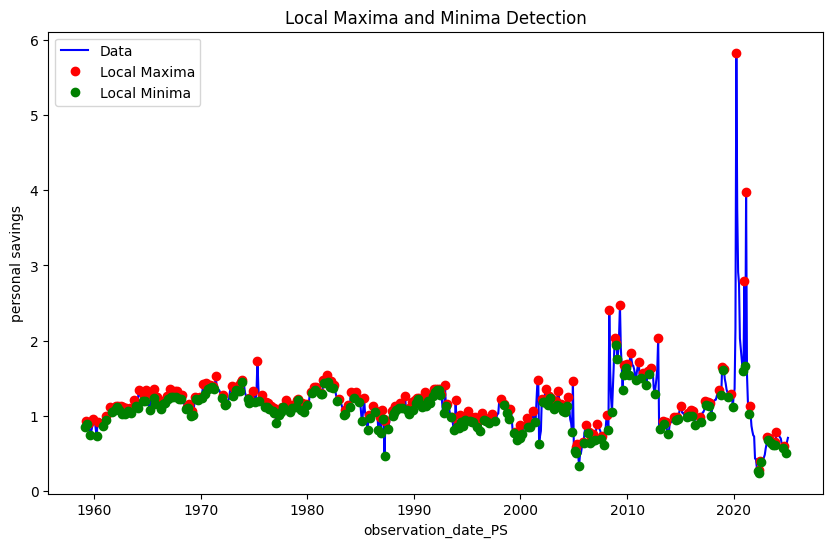

In [40]:
# Κάνουμε ένα plot που φαίνονται τα ελάχιστα και τα μέγιστα
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Data', color='blue')
plt.plot(x[max_indices], max_values, 'ro', label='Local Maxima')  # red: μέγιστα
plt.plot(x[min_indices], min_values, 'go', label='Local Minima')  # green: ελάχιστα
plt.xlabel('observation_date_PS')
plt.ylabel('personal savings')
plt.title('Local Maxima and Minima Detection')
plt.legend()
plt.show()


## Κρατάμε τα ελάχιστα του personal savings

In [43]:
df_new_min_sav=df.iloc[min_indices]

In [44]:
#παίρνουμε το Dataframe στο οποίο έχουμε τις τιμές για τα GDP, Capital inflow όπου το personal saving είναι ελάχιστο
df_new_min_sav[['capinfl/capinflsmthd','GDP/GDPSMTHD','perssav/persavsmthd']].dropna()

,capinfl/capinflsmthd,GDP/GDPSMTHD,perssav/persavsmthd
2,1.370104,0.839907,0.853850
4,1.098574,0.847243,0.891279
8,0.266547,0.878726,0.739224
15,0.926688,0.934285,0.734545
22,1.079642,0.954925,0.867886
...,...,...,...
622,0.285696,1.150762,1.481528
628,-0.062167,1.148706,1.505982
633,1.389258,1.159530,1.404674
637,1.470756,1.158741,1.554727


In [ ]:
#αποθηκεύουμε το Dataframe καθώς μπορεί να μας βοηθήσει πιθανές συσχετίσεις
file_path = r'C:\Users\chilly\Desktop\micronomic datas\clean_data_min_savmin.csv'
df_new_min.to_csv(file_path, index=False)

## Κρατάμε τα μέγστα  του personal savings

In [41]:
df_new_max_sav=df.iloc[max_indices]

In [45]:
#παίρνουμε το Dataframe στο οποίο έχουμε τις τιμές για τα GDP, Capital inflow όπου το personal saving είναι μέγιστο
df_new_max_sav[['perssav/persavsmthd','capinfl/capinflsmthd','GDP/GDPSMTHD']].dropna()

,perssav/persavsmthd,capinfl/capinflsmthd,GDP/GDPSMTHD
3,0.935726,1.363129,0.843110
6,0.905315,0.569465,0.855509
11,0.952102,0.471814,0.904038
17,0.919351,1.239570,0.949433
25,0.998888,1.070674,0.938533
...,...,...,...
625,1.717102,0.256686,1.148913
630,1.568013,1.602461,1.150803
636,1.599950,1.595110,1.154909
639,1.638843,1.163078,1.165888


In [ ]:
#αποθηκεύουμε το Dataframe καθώς μπορεί να μας βοηθήσει πιθανές συσχετίσεις
file_path = r'C:\Users\chilly\Desktop\micronomic datas\clean_data_max_savmax.csv'
df_new_min.to_csv(file_path, index=False)

## Ξεκινάμε να βρόυμε τα Μέγιστα και τα Ελάχιστα του GDP


In [46]:
# Μετατρέπουμε την στήλη των ημερομηνιών σε datetime
df['observation_date_GDP'] = pd.to_datetime(df['observation_date_PS'].astype(str), errors='coerce')
# Όριζουμε στον άξονα τον x της ημερομηνίες και στον y της τιμές του GDP
x =df['observation_date_GDP']
y =df['GDP/GDPSMTHD']


# Βρίσκουμε τοπικά μέγιστα χρησιμοποιώντας SciPy's συνάρτηση
max_indices, _ = find_peaks(y, prominence=0.001) # 'prominence' : μετράει πόσο «ξεχωρίζει» μια κορυφή από το γύρω της τοπίο
max_values = y[max_indices] 

# # Βρίσκουμε τοπικά ελάχιστα χρησιμοποιώντας SciPy's συνάρτηση
min_indices, _ = find_peaks(-y, prominence=0.001)
min_values = y[min_indices]  

# Τυπώνουμε τα μέγιστα και τα ελάχιστα  που βρήκαμε:
print("Local Maximum Indices:", max_indices)
print("Local Maximum Values:", max_values)
print("Local Minimum Indices:", min_indices)
print("Local Minimum Values:", min_values)

Local Maximum Indices: [ 21  30  60  69 102 120 126 147 156 180 186 192 210 228 255 264 294 303
 315 321 327 333 348 366 381 390 408 414 447 489 507 516 549 567 573 582
 591 597 606 621 633 639 708 765 792 801 810 819 858 870 912 918]
Local Maximum Values: 21     0.961017
30     0.935388
60     1.233364
69     1.230967
102    1.147575
120    1.153504
126    1.146233
147    1.151720
156    1.145648
180    1.143183
186    1.143996
192    1.138369
210    1.165582
228    1.219272
255    1.213874
264    1.216590
294    1.195964
303    1.216136
315    1.249883
321    1.251041
327    1.243320
333    1.245740
348    1.266250
366    1.275865
381    1.314781
390    1.306909
408    1.305985
414    1.291757
447    1.237742
489    1.178839
507    1.186281
516    1.180978
549    1.139716
567    1.141115
573    1.144117
582    1.135864
591    1.142181
597    1.142982
606    1.150141
621    1.151323
633    1.159530
639    1.165888
708    1.159536
765    1.058363
792    1.089171
801    1.102561
810    

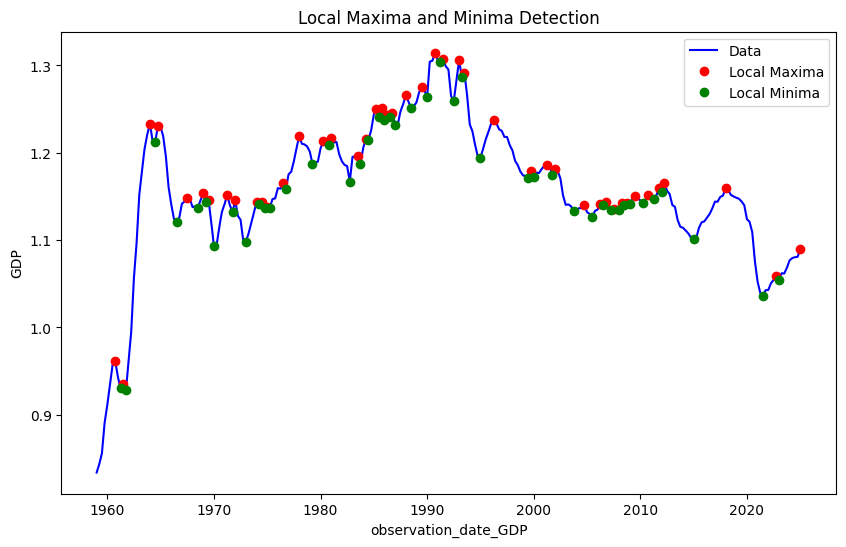

In [47]:
# Κάνουμε ένα plot που φαίνονται τα ελάχιστα και τα μέγιστα
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Data', color='blue')
plt.plot(x[max_indices], max_values, 'ro', label='Local Maxima')  # red: μέγιστα
plt.plot(x[min_indices], min_values, 'go', label='Local Minima')  # green: ελάχιστα
plt.xlabel('observation_date_GDP')
plt.ylabel('GDP')
plt.title('Local Maxima and Minima Detection')
plt.legend()
plt.show()

## Κρατάμε τα ελάχιστα του GDP

In [48]:
df_new_min_GDP=df.iloc[min_indices]

In [51]:
#παίρνουμε το Dataframe στο οποίο έχουμε τις τιμές για τα Personal savings, Capital inflow όπου το GDP είναι ελάχιστο
df_new_min_GDP[['GDP/GDPSMTHD','perssav/persavsmthd','capinfl/capinflsmthd']].dropna()

,GDP/GDPSMTHD,perssav/persavsmthd,capinfl/capinflsmthd
27,0.930116,0.954441,1.008895
33,0.927635,1.094800,1.164339
66,1.212383,1.213369,0.988188
90,1.120089,1.152314,3.230009
114,1.137206,1.105643,2.284155
123,1.143682,1.004829,0.454828
132,1.093105,1.254241,1.789268
153,1.131710,1.338643,1.738351
168,1.098167,1.258365,1.501656
183,1.141609,1.266897,0.803685


In [ ]:
#αποθηκεύουμε το Dataframe καθώς μπορεί να μας βοηθήσει πιθανές συσχετίσεις
file_path = r'C:\Users\chilly\Desktop\micronomic datas\clean_data_min_GDPmin.csv'
df_new_min.to_csv(file_path, index=False)

## Κρατάμε τα μέγιστα του GDP

In [53]:
df_new_max_GDP=df.iloc[max_indices]

In [54]:
#παίρνουμε το Dataframe στο οποίο έχουμε τις τιμές για τα Personal savings, Capital inflow όπου το GDP είναι μέγιστο
df_new_max_GDP[['GDP/GDPSMTHD','perssav/persavsmthd','capinfl/capinflsmthd']].dropna()

,GDP/GDPSMTHD,perssav/persavsmthd,capinfl/capinflsmthd
21,0.961017,0.874904,1.068681
30,0.935388,1.111175,-0.414020
60,1.233364,1.141586,0.310889
69,1.230967,1.195992,0.467395
102,1.147575,1.321516,2.681602
120,1.153504,1.063177,1.692550
126,1.146233,1.252731,0.998380
147,1.151720,1.355499,1.282219
156,1.145648,1.241906,2.650340
180,1.143183,1.413534,0.510903


In [ ]:
#αποθηκεύουμε το Dataframe καθώς μπορεί να μας βοηθήσει πιθανές συσχετίσεις
file_path = r'C:\Users\chilly\Desktop\micronomic datas\clean_data_max_GDPvmax.csv'
df_new_min.to_csv(file_path, index=False)